In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('./Historical_Product_Demand.csv', parse_dates=True, date_format='%d%M%Y')

In [5]:
data.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [6]:
data.shape

(1048575, 5)

In [7]:
data.isna().sum()

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

In [8]:
# Percent Missing values
(data['Date'].isna().sum()/data.shape[0])*100

1.0718355863910547

In [9]:
# 1.07% is not much, can be dropped
data.dropna(inplace=True)

In [10]:
data.isna().sum()

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1037336 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1037336 non-null  object
 1   Warehouse         1037336 non-null  object
 2   Product_Category  1037336 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1037336 non-null  object
dtypes: object(5)
memory usage: 47.5+ MB


In [12]:
# observation: there is something wrong with the way the data is formatted

In [13]:
[val for val in data['Order_Demand'] if type(val)!=int()]

# Issue: there are trailing spaces

['100 ',
 '500 ',
 '500 ',
 '500 ',
 '500 ',
 '500 ',
 '500 ',
 '500 ',
 '500 ',
 '500 ',
 '500 ',
 '500 ',
 '500 ',
 '500 ',
 '500 ',
 '500 ',
 '50000 ',
 '100000 ',
 '50000 ',
 '50000 ',
 '50000 ',
 '50000 ',
 '50000 ',
 '50000 ',
 '50000 ',
 '50000 ',
 '50000 ',
 '50000 ',
 '50000 ',
 '50000 ',
 '50000 ',
 '50000 ',
 '50000 ',
 '50000 ',
 '50000 ',
 '50000 ',
 '50000 ',
 '50000 ',
 '50000 ',
 '50000 ',
 '50000 ',
 '50000 ',
 '100000 ',
 '50000 ',
 '100000 ',
 '50000 ',
 '50000 ',
 '4 ',
 '4 ',
 '4 ',
 '150000 ',
 '150000 ',
 '150000 ',
 '150000 ',
 '160000 ',
 '160000 ',
 '160000 ',
 '160000 ',
 '160000 ',
 '160000 ',
 '160000 ',
 '160000 ',
 '160000 ',
 '1000 ',
 '1000 ',
 '1000 ',
 '1000 ',
 '1000 ',
 '20000 ',
 '20000 ',
 '20000 ',
 '1000 ',
 '1000 ',
 '1000 ',
 '1000 ',
 '2000 ',
 '1000 ',
 '1000 ',
 '1000 ',
 '20000 ',
 '1000 ',
 '20000 ',
 '10000 ',
 '10000 ',
 '30000 ',
 '20000 ',
 '1000 ',
 '1000 ',
 '1000 ',
 '20000 ',
 '40000 ',
 '1000 ',
 '1000 ',
 '1000 ',
 '1000 ',
 '30

In [14]:
data['Order_Demand'] = data['Order_Demand'].str.replace(' ', '')

In [15]:
# data['Order_Demand'].astype(int) # Error 

In [16]:
data['Order_Demand'] = data['Order_Demand'].str.replace('(', '')
data['Order_Demand'] = data['Order_Demand'].str.replace(')', '')

In [17]:
data['Order_Demand'] = data['Order_Demand'].astype(int)

In [18]:
data['Date'] = pd.to_datetime(data['Date'])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1037336 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Product_Code      1037336 non-null  object        
 1   Warehouse         1037336 non-null  object        
 2   Product_Category  1037336 non-null  object        
 3   Date              1037336 non-null  datetime64[ns]
 4   Order_Demand      1037336 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 47.5+ MB


In [20]:
data.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression


X = data.drop(columns=['Product_Code', 'Date', 'Order_Demand'])
y = data['Order_Demand'].values

In [22]:
ohe = OneHotEncoder().fit(X[['Product_Category', 'Warehouse']].values)

In [23]:
X_encoded = ohe.transform(X[['Product_Category', 'Warehouse']].values).toarray()

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(X_encoded, y, test_size=0.3)

In [25]:
lr_model = LinearRegression().fit(xtrain, ytrain)

In [26]:
from sklearn.metrics import mean_squared_error

print(f'training rmse: {np.sqrt(mean_squared_error(ytrain, lr_model.predict(xtrain)))}')
print(f'testing rmse: {np.sqrt(mean_squared_error(ytest, lr_model.predict(xtest)))}')

training rmse: 29142.01564136316
testing rmse: 26972.35688173735


In [27]:
time_series_data = data.set_index('Date')

In [28]:
time_series_data.sort_index(ascending=True, inplace=True)

In [29]:
time_series_data

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2011-01-08,Product_0965,Whse_A,Category_006,2
2011-05-31,Product_1724,Whse_A,Category_003,108
2011-06-24,Product_1521,Whse_S,Category_019,85000
2011-06-24,Product_1521,Whse_S,Category_019,7000
2011-09-02,Product_1507,Whse_C,Category_019,1250
...,...,...,...,...
2017-01-06,Product_1710,Whse_J,Category_026,15
2017-01-06,Product_1359,Whse_J,Category_019,100000
2017-01-09,Product_0250,Whse_C,Category_007,148


In [30]:
time_series_data['Product_Category'].unique()

array(['Category_006', 'Category_003', 'Category_019', 'Category_001',
       'Category_023', 'Category_011', 'Category_007', 'Category_009',
       'Category_021', 'Category_028', 'Category_004', 'Category_015',
       'Category_024', 'Category_030', 'Category_026', 'Category_018',
       'Category_032', 'Category_013', 'Category_020', 'Category_005',
       'Category_022', 'Category_031', 'Category_010', 'Category_008',
       'Category_033', 'Category_017', 'Category_029', 'Category_025',
       'Category_012', 'Category_014', 'Category_002', 'Category_027',
       'Category_016'], dtype=object)

In [31]:
category_access = time_series_data.groupby(['Product_Category', 'Date'])['Order_Demand'].sum()

<Axes: xlabel='Date'>

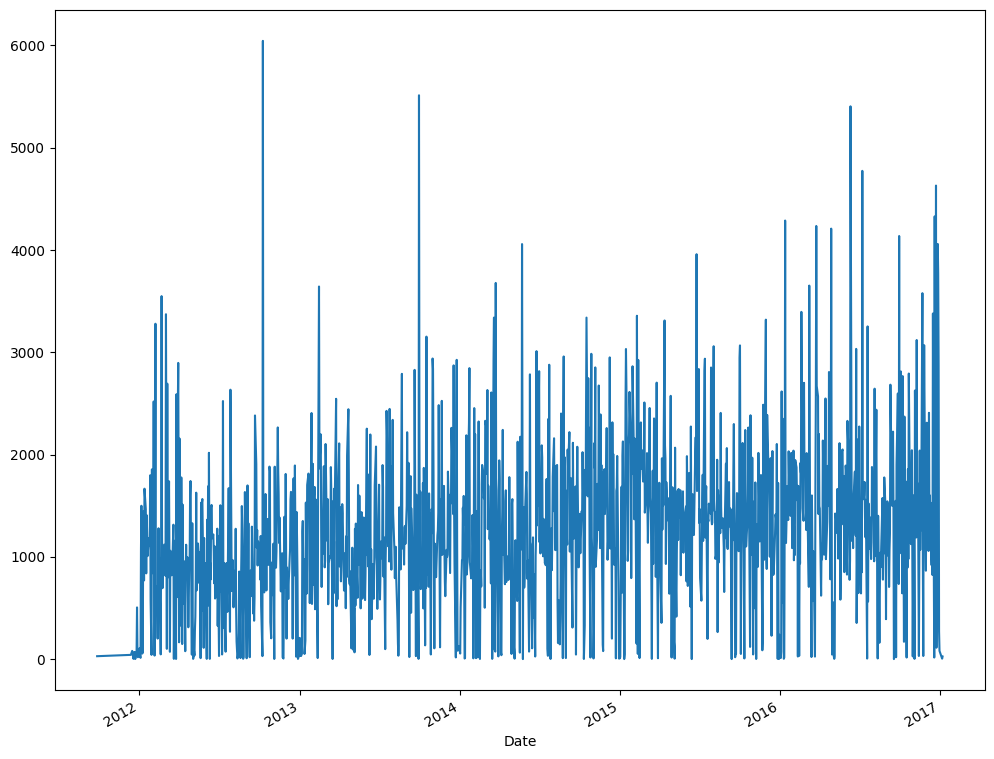

In [32]:
# Change the loc argument here to slice the grouped dataframe for category_002, 003, .... so on


category_access.loc['Category_001'].plot(figsize=(12, 10))

<Axes: xlabel='Date'>

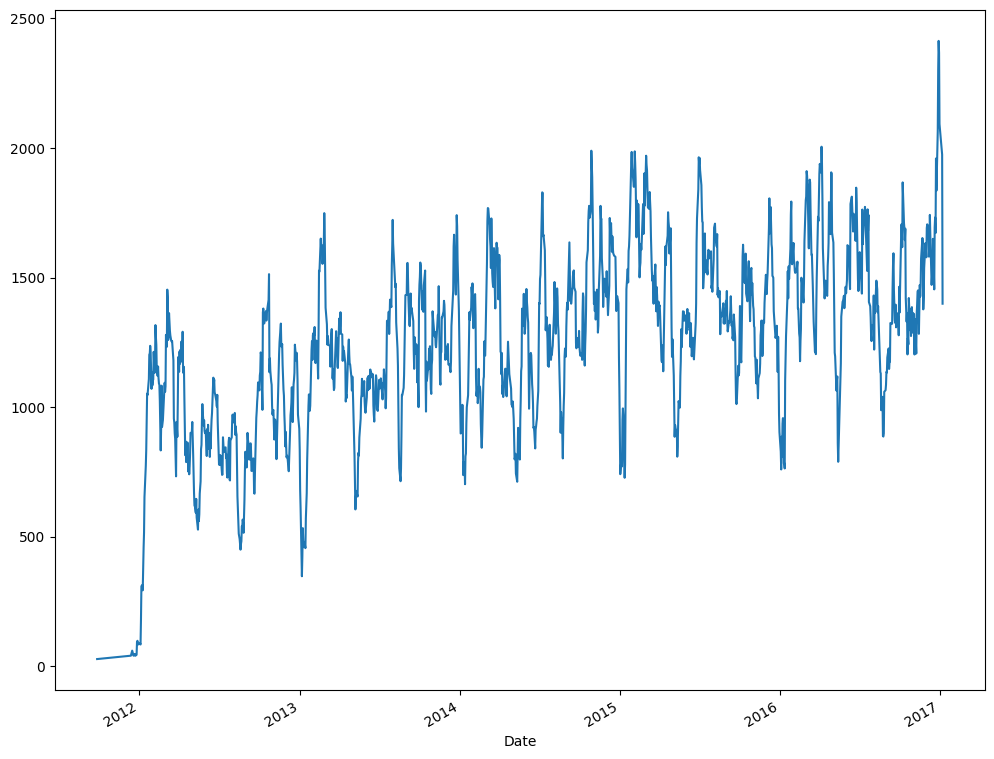

In [33]:
category_access.loc['Category_001'].rolling('15D').mean().plot(figsize=(12, 10))

<Axes: >

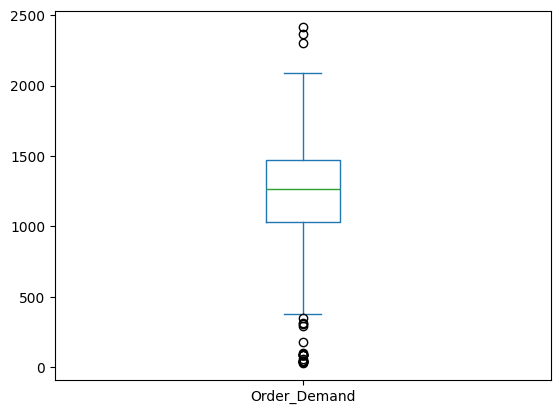

In [34]:
category_access.loc['Category_001'].rolling('15D').mean().plot.box()

In [35]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [36]:
category_001 = category_access.loc['Category_001'].rolling('15D').mean()

In [37]:
adfuller(category_001, autolag='AIC')

(-5.365158145406039,
 4.007258711939537e-06,
 12,
 1394,
 {'1%': -3.43504970049035,
  '5%': -2.8636155795606397,
  '10%': -2.5678750323275197},
 16412.982350596492)

In [38]:
category_001.shape

(1407,)

In [39]:
partition = int(category_001.shape[0]/3)

In [40]:
part1 = category_001.iloc[0:0+partition]
part2 = category_001.iloc[0+partition:0+(2*partition)]
part3 = category_001.iloc[0+(2*partition):0+(3*partition)]

In [41]:
from scipy.stats import ttest_rel

In [42]:
ttest_rel(part1, part2, alternative='two-sided')

TtestResult(statistic=-21.08345458312442, pvalue=7.302804796290826e-70, df=468)

In [43]:
ttest_rel(part2, part3)

TtestResult(statistic=-5.974132641676436, pvalue=4.584350657000041e-09, df=468)

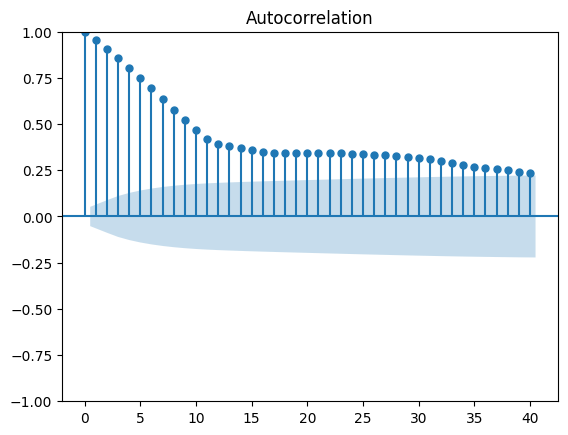

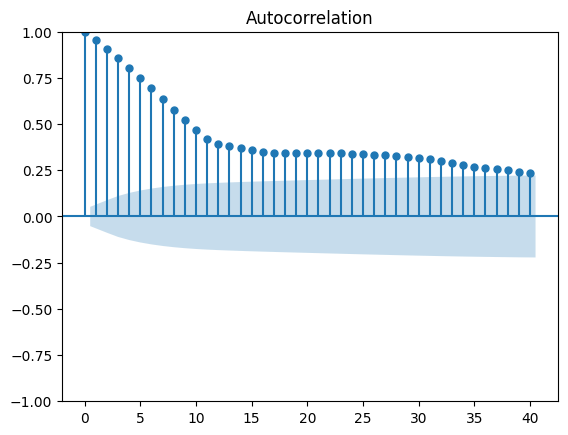

In [44]:
plot_acf(category_001, lags=40)

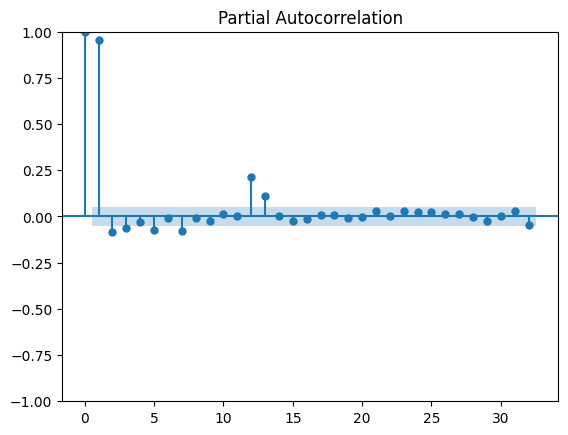

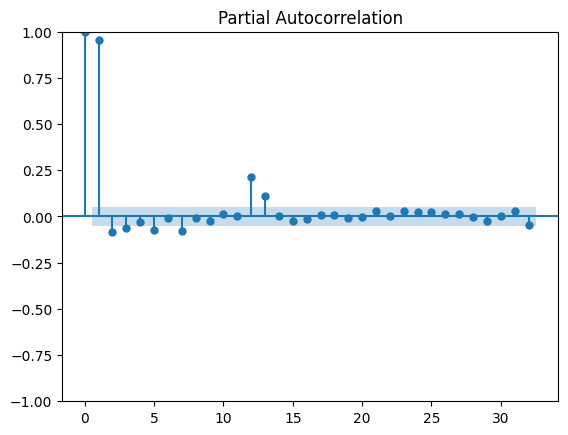

In [45]:
plot_pacf(category_001)

In [46]:
from statsmodels.tsa.arima.model import ARIMA

In [47]:
model = ARIMA(pd.concat((part1, part2)), order=(1, 0, 30)).fit()


/home/advait/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/advait/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/advait/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [48]:
pred = pd.Series([model.predict(val).iloc[0] for val in range(939, 939+469)])

/home/advait/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/advait/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/advait/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/advait/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_inde

In [49]:
pred.index = part3.index

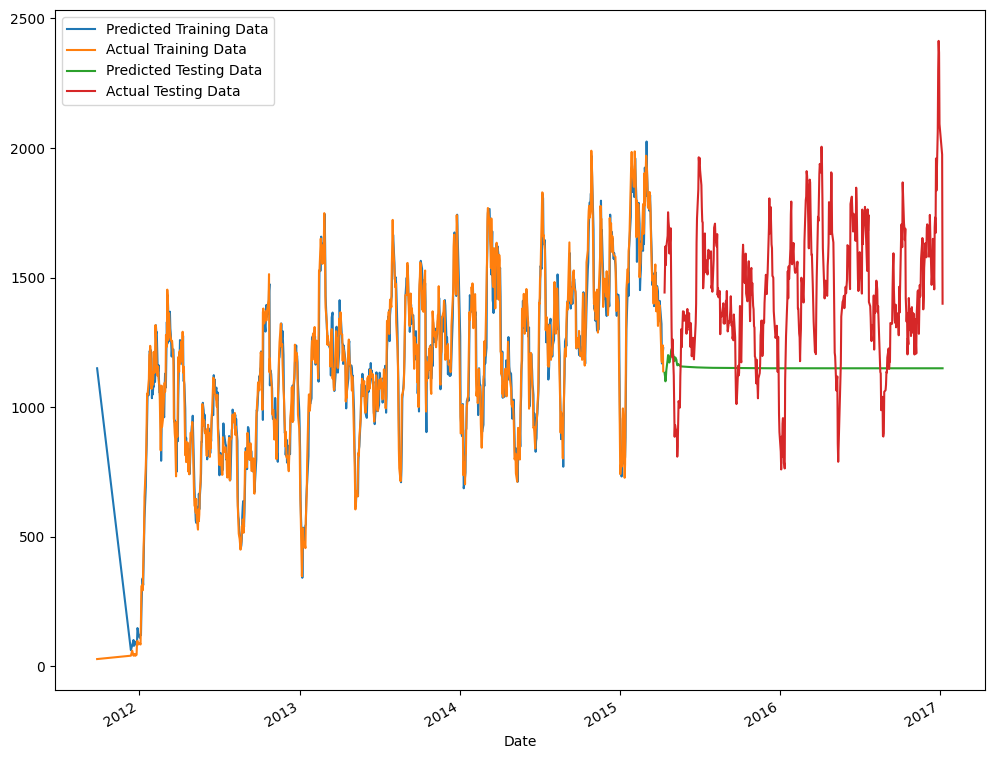

In [50]:
model.predict().plot(figsize=(12, 10))
pd.concat((part1, part2)).plot()
pred.plot()
part3.plot()

plt.legend(['Predicted Training Data', 'Actual Training Data', 'Predicted Testing Data', 'Actual Testing Data'])

In [51]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(pd.concat((part1, part2)), model.predict())) # for the training data (parts 1 and 2 of category 001 products)

91.72872114734871

In [52]:
from sklearn.metrics import mean_squared_error


np.sqrt(mean_squared_error(part3, pred)) # for the testing data

385.6315216822099

In [53]:
from pmdarima.arima import auto_arima

In [54]:
aa_model = auto_arima(pd.concat((part1, part2)))

In [55]:
aa_model.fit(pd.concat((part1, part2)))

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [56]:
forecast_aa = pd.Series([aa_model.predict(val).iloc[0] for val in range(939, 939+469)], index=part3.index);

/home/advait/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/advait/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/advait/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/advait/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exceptio

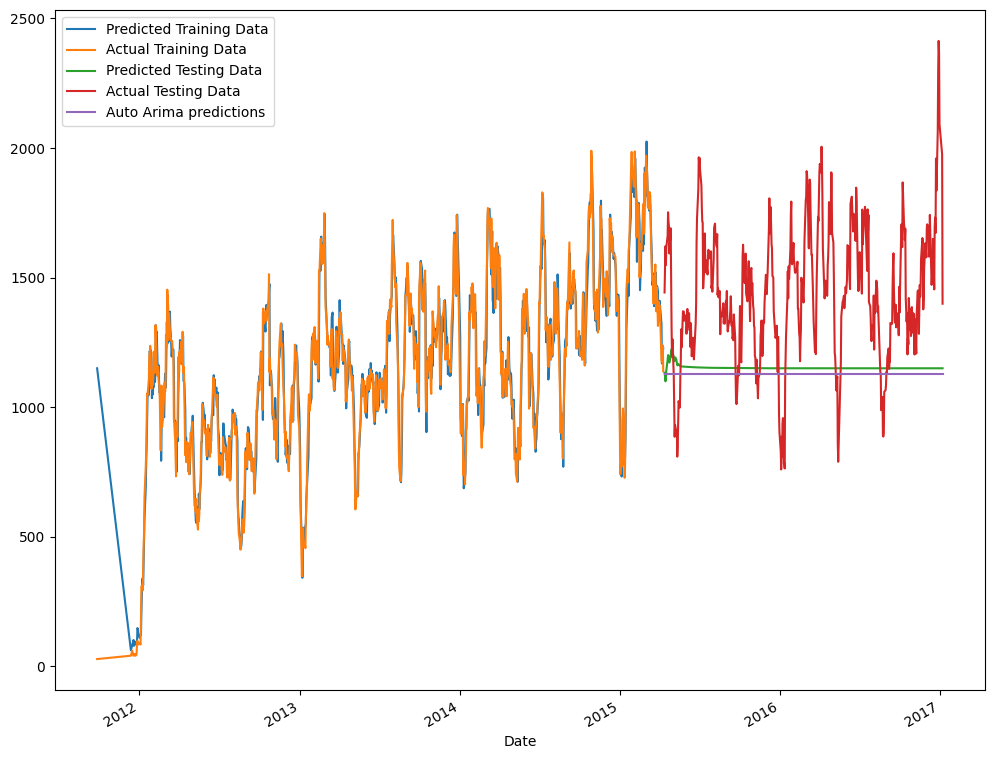

In [57]:
model.predict().plot(figsize=(12, 10))
pd.concat((part1, part2)).plot()
pred.plot()
part3.plot()
forecast_aa.plot()
plt.legend(['Predicted Training Data', 'Actual Training Data', 'Predicted Testing Data', 'Actual Testing Data', 'Auto Arima predictions'])

In [386]:
# LSTM model starts here

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer, Reshape
from sklearn.preprocessing import MinMaxScaler

In [394]:
minmaxscaler = MinMaxScaler().fit(category_001.values.reshape(-1, 1))

In [395]:
data_scaled = minmaxscaler.transform(category_001.values.reshape(-1, 1))

In [396]:
data_scaled.shape

(1407, 1)

In [397]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [551]:
look_back = 30

In [552]:
X, y = create_dataset(data_scaled, look_back=look_back)

In [553]:
test_size = int(len(X) * 0.3)
train_size = len(X) - test_size

In [554]:
train_size, test_size

(964, 412)

In [555]:
xtrain_lstm, xtest_lstm = X[0:train_size,:], X[train_size:len(X),:]

In [556]:
ytrain_lstm, ytest_lstm = y[0:train_size], y[train_size:len(y)]

In [557]:
ytrain_lstm.shape, ytest_lstm.shape

((964,), (412,))

In [558]:
xtrain_lstm.shape

(964, 30)

In [559]:
xtrain_lstm = xtrain_lstm.reshape((xtrain_lstm.shape[0], 1, xtrain_lstm.shape[1]))

In [560]:
xtest_lstm = xtest_lstm.reshape((xtest_lstm.shape[0], 1, xtest_lstm.shape[1]))

In [561]:
model = Sequential()

model.add(InputLayer(input_shape=(1, look_back)))
model.add(LSTM(64, activation='relu'))
model.add(Dense(1))

In [562]:
model.compile(optimizer='rmsprop', loss='mse')

In [563]:
model.fit(xtrain_lstm, ytrain_lstm)

28/31 [==========================>...] - ETA: 0s - loss: 0.0374

31/31 [==============================] - 3s 72ms/step - loss: 0.0355


In [564]:
model.evaluate(xtest_lstm, ytest_lstm)

13/13 [==============================] - 0s 2ms/step - loss: 0.0120


0.01196321565657854

In [565]:
lstm_pred_test = model.predict(xtest_lstm)

13/13 [==============================] - 0s 1ms/step


In [572]:
lstm_pred_train = model.predict(xtrain_lstm)

31/31 [==============================] - 0s 4ms/step


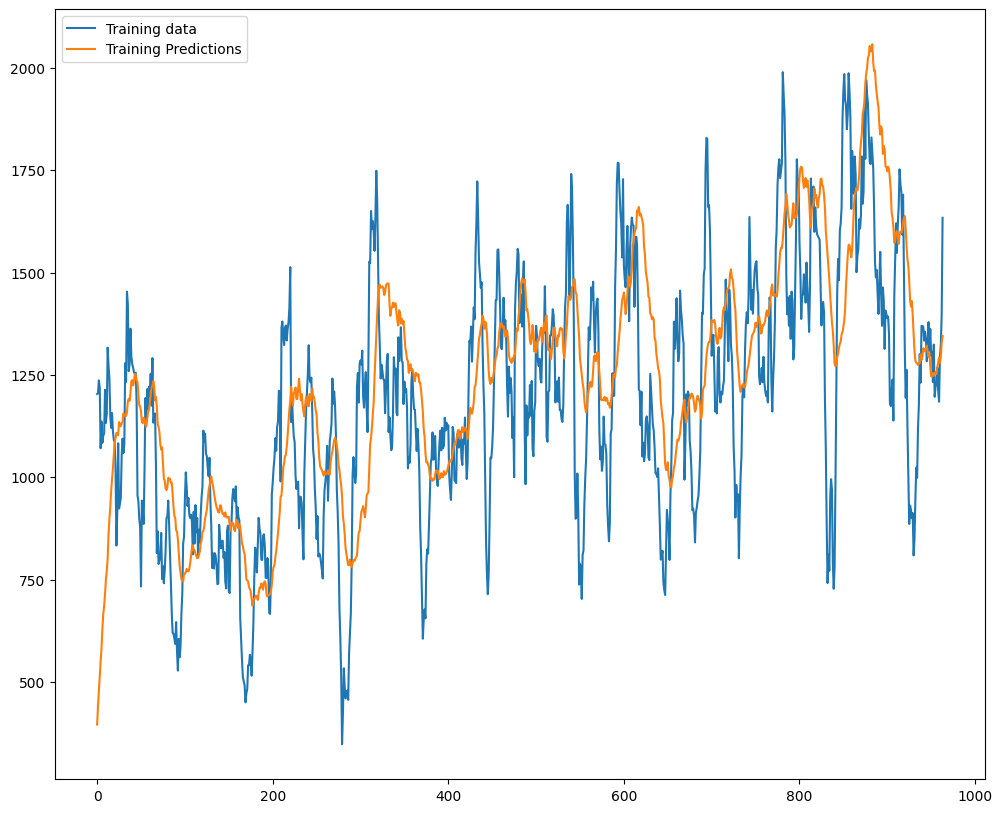

In [576]:
plt.figure(figsize=(12, 10))
plt.plot(minmaxscaler.inverse_transform(ytrain_lstm.reshape(-1, 1)))
plt.plot(minmaxscaler.inverse_transform(lstm_pred_train.reshape(-1, 1)))
plt.legend(['Training data', 'Training Predictions'])

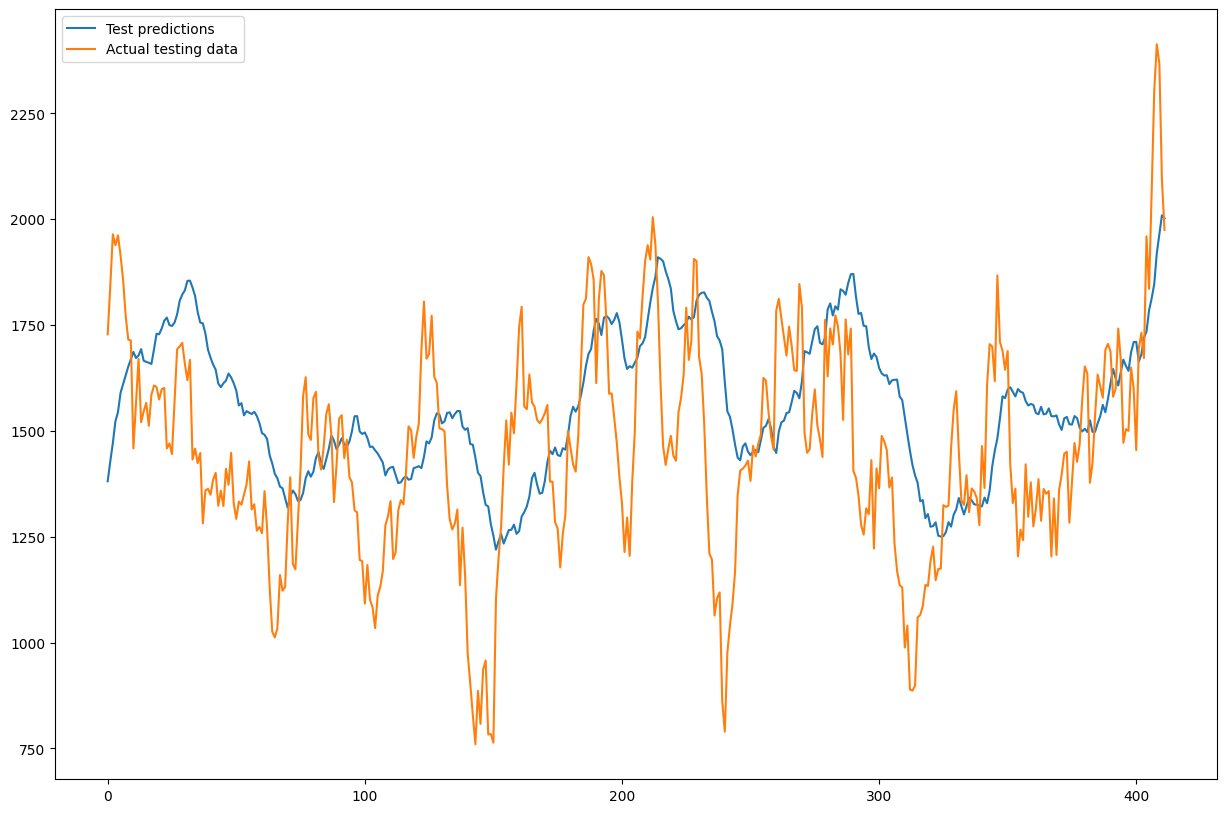

In [577]:
plt.figure(figsize=(15, 10))
plt.plot(minmaxscaler.inverse_transform(lstm_pred_test.reshape(-1, 1)))
plt.plot(minmaxscaler.inverse_transform(ytest_lstm.reshape(-1, 1)))
plt.legend(['Test predictions', 'Actual testing data'])

In [ ]:
plt.plot